<a href="https://colab.research.google.com/github/yjyuwisely/AI_project_mastery_bootcamp/blob/main/mini_project_Caricature_Profile_Pic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

241106 프롬프트 엔지니어링 과제

사진 올리면 캐리커쳐 스타일 프로필 사진 만드는 프로그램

사용한 것: ChatGPT-4o

In [ ]:
!pip install opencv-python-headless
!pip install numpy Pillow


사진 여러장 올릴 수 있다.

Please upload images to create round caricature profile pictures (you can upload multiple images at once):


Saving Screenshot 2024-11-06 143023.png to Screenshot 2024-11-06 143023 (4).png
Saving Screenshot 2024-11-06 143943.png to Screenshot 2024-11-06 143943.png
Saving Screenshot 2024-11-06 144005.png to Screenshot 2024-11-06 144005.png

Here's your round caricature profile picture #1 with transparent background:


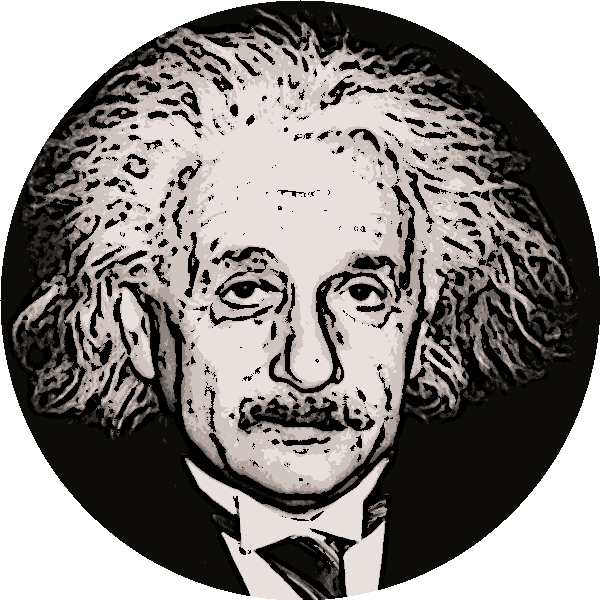


Image saved as 'round_caricature_pic_1.png'

Here's your round caricature profile picture #2 with transparent background:


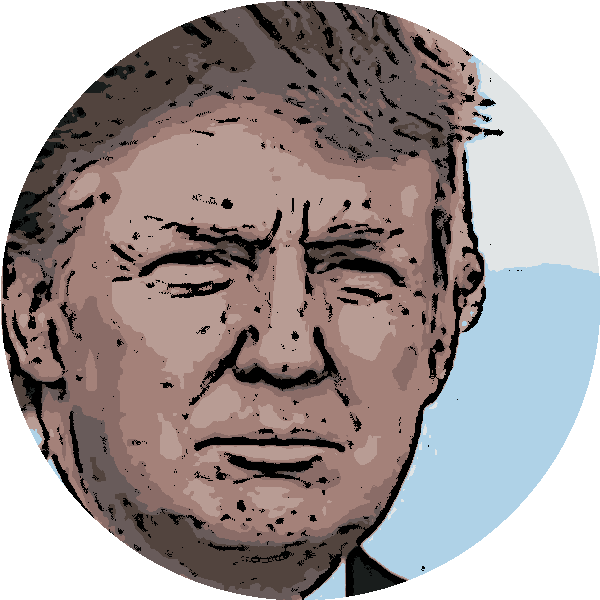


Image saved as 'round_caricature_pic_2.png'

Here's your round caricature profile picture #3 with transparent background:


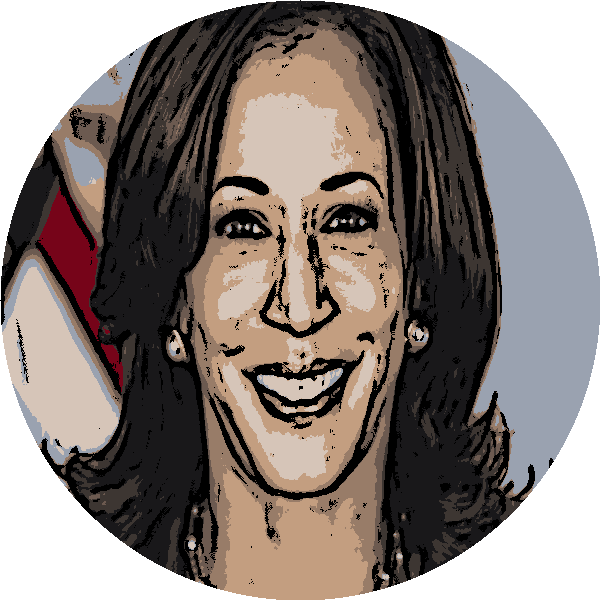


Image saved as 'round_caricature_pic_3.png'


In [39]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import PIL

def upload_photos():
    # File upload (allow multiple files)
    uploaded = files.upload()

    # List to store uploaded images as PIL images
    images = []

    # Read each uploaded file
    for filename in uploaded.keys():
        image = PIL.Image.open(filename)
        images.append(image)

    return images

def caricature_effect(image):
    # Convert PIL image to OpenCV format
    cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Resize the image for easier processing
    cv_image = cv2.resize(cv_image, (600, 600))

    # Step 1: Apply bilateral filter to smoothen image while retaining edges
    smoothed_image = cv2.bilateralFilter(cv_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 2: Convert to grayscale
    gray_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply median blur
    blurred_gray = cv2.medianBlur(gray_image, 7)

    # Step 4: Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(blurred_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

    # Step 5: Apply color quantization using k-means clustering
    Z = cv_image.reshape((-1, 3))
    Z = np.float32(Z)

    # Criteria for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8  # Number of colors for quantization
    _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to uint8 and reshape to original image
    center = np.uint8(center)
    quantized_image = center[label.flatten()]
    quantized_image = quantized_image.reshape((cv_image.shape))

    # Step 6: Combine edges and quantized color image
    caricature_image = cv2.bitwise_and(quantized_image, quantized_image, mask=edges)

    return caricature_image

def create_circular_profile(image):
    # Create circular mask
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    radius = min(width, height) // 2

    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)

    # Create an RGBA image with transparency (4 channels)
    circular_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Set all pixels outside the mask to be fully transparent
    for i in range(height):
        for j in range(width):
            if mask[i, j] == 0:
                circular_image[i, j, 3] = 0  # Set alpha channel to 0 (transparent)

    return circular_image

def main():
    print("Please upload images to create round caricature profile pictures (you can upload multiple images at once):")

    # Upload photos
    images = upload_photos()

    # Process each image
    for idx, image in enumerate(images):
        # Apply caricature effect
        caricature_pic = caricature_effect(image)

        # Create circular profile with transparent background
        round_profile_pic = create_circular_profile(caricature_pic)

        # Save the image with a transparent background
        output_filename = f'round_caricature_pic_{idx+1}.png'
        cv2.imwrite(output_filename, round_profile_pic)

        # Display the result
        print(f"\nHere's your round caricature profile picture #{idx+1} with transparent background:")
        cv2_imshow(round_profile_pic)

        print(f"\nImage saved as '{output_filename}'")

# Run the program
main()


원형 사진 아닌 원본 그대로 캐리커쳐 스타일 만들기

Please upload an image to create a caricature effect:


Saving Screenshot 2024-11-06 135304.png to Screenshot 2024-11-06 135304 (1).png

Here's your caricature effect picture:


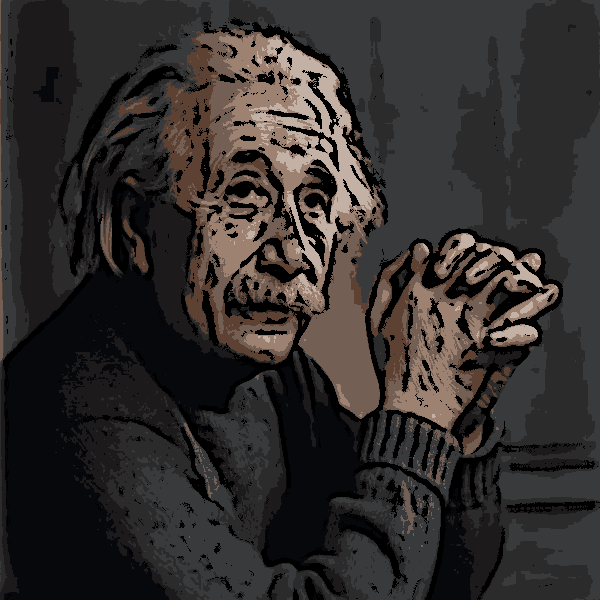


Image saved as 'caricature_pic.jpg'


In [ ]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import PIL

def upload_photo():
    # File upload
    uploaded = files.upload()

    # Assuming one file is uploaded
    for filename in uploaded.keys():
        # Read the uploaded image
        image = PIL.Image.open(filename)
        return image

def caricature_effect(image):
    # Convert PIL image to OpenCV format
    cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Resize the image for easier processing
    cv_image = cv2.resize(cv_image, (600, 600))

    # Step 1: Apply bilateral filter to smoothen image while retaining edges
    smoothed_image = cv2.bilateralFilter(cv_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 2: Convert to grayscale
    gray_image = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply median blur
    blurred_gray = cv2.medianBlur(gray_image, 7)

    # Step 4: Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(blurred_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

    # Step 5: Apply color quantization using k-means clustering
    Z = cv_image.reshape((-1, 3))
    Z = np.float32(Z)

    # Criteria for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8  # Number of colors for quantization
    _, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to uint8 and reshape to original image
    center = np.uint8(center)
    quantized_image = center[label.flatten()]
    quantized_image = quantized_image.reshape((cv_image.shape))

    # Step 6: Combine edges and quantized color image
    caricature_image = cv2.bitwise_and(quantized_image, quantized_image, mask=edges)

    return caricature_image

def main():
    print("Please upload an image to create a caricature effect:")

    # Upload photo
    image = upload_photo()

    # Apply caricature effect
    caricature_pic = caricature_effect(image)

    # Save the image
    cv2.imwrite('caricature_pic.jpg', caricature_pic)

    # Display the result
    print("\nHere's your caricature effect picture:")
    cv2_imshow(caricature_pic)

    print("\nImage saved as 'caricature_pic.jpg'")

# Run the program
main()
